In [10]:
train_split=20000
from torchnlp.datasets import imdb_dataset
train = imdb_dataset(train=True)
test= imdb_dataset(test=True)

[{'text': "Ok, everybody agreed on what was the best season. The first. And killing off Boone was a bad desicion. Also killing off others was bad. Blame the directors and writers for it. Bad boys. BUT. I still think this is the best scifi series ever! Sorry guys I can't help it! I see that the quality of the series was decreasing after the first season. Still it's easy to accept Liam as the new main character, if you are over Boone. He is really... mysterious. The thing that shocked me most was when Lilli was written out of the story and how. That was something she didn't deserve! And what do we get? Some blonde chick called Renee, with absolutely no character! But these Taelons stay mysterious, and you stay wondering about theyre true plans till the end. True Suspence. The conversations between Zo'or and Da'an are sometimes brilliant.<br /><br />I understand that, when you jump in on an episode from the 3th,4th or 5th season, you may not understand this show. But when you watch from t

In [2]:
import pickle as pkl

pkl.dump(train,open("train.pkl","wb"))
pkl.dump(test,open("test.pkl","wb"))

NameError: name 'train' is not defined

In [1]:
import pickle as pkl

train=pkl.load(open("train.pkl","rb"))
test=pkl.load(open("test.pkl","rb"))

train_split=20000

training=train[:train_split//2]+train[12500:12500+train_split//2]
train_data=[]
train_target=[]
for sample in training:
    train_data+=[sample['text']]
    if sample['sentiment']=='pos':
        train_target+=[1]
    else:
        train_target+=[0]

validation=train[train_split//2:12500]+train[12500+train_split//2:]
val_data=[]
val_target=[]
for sample in validation:
    val_data+=[sample['text']]
    if sample['sentiment']=='pos':
        val_target+=[1]
    else:
        val_target+=[0]

test_data=[]
test_target=[]
for sample in test:
    test_data+=[sample["text"]]
    if sample['sentiment']=='pos':
        test_target+=[1]
    else:
        test_target+=[0]
print(len(train_data))
print(len(val_data))
print(len(test_data))

20000
5000
25000


In [2]:
import spacy
import string

tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

def tokenize(sent):
  tokens = tokenizer(sent)
  #return [tokens]
  return [token.text.lower() for token in tokens if (token.text not in punctuations)]

In [3]:
import pickle as pkl

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens, open("val_data_tokens_noPrep.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens_noPrep.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
pkl.dump(train_data_tokens, open("train_data_tokens_noPrep.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_noPrep.p", "wb"))

Tokenizing val data


KeyboardInterrupt: 

In [2]:
import pickle as pkl

train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))

#print(all_train_tokens[0])
#print(all_train_tokens[1])

t_all=[]
#bigrams
for i in range(len(all_train_tokens)-1):
    t_all.append(all_train_tokens[i]+" "+all_train_tokens[i+1])
    #t_all.append(all_train_tokens[i]+" "+all_train_tokens[i+1]+" "+all_train_tokens[i+2])


for rev in train_data_tokens:
    brev=[]
    trev=[]
    frev=[]
    for i in range(len(rev)-1):
        brev.append(rev[i]+" "+rev[i+1])
    #for i in range(len(rev)-2):
    #    trev.append(rev[i]+" "+rev[i+1]+" "+rev[i+2])
    #for i in range(len(rev)-3):
    #    frev.append(rev[i]+" "+rev[i+1]+" "+rev[i+2]+" "+rev[i+3])
    rev+=brev
    #rev+=trev
    #rev+=frev
for rev in val_data_tokens:
    brev=[]
    trev=[]
    frev=[]
    for i in range(len(rev)-1):
        brev.append(rev[i]+" "+rev[i+1])
    #for i in range(len(rev)-2):
    #    trev.append(rev[i]+" "+rev[i+1]+" "+rev[i+2])
    #for i in range(len(rev)-3):
    #    frev.append(rev[i]+" "+rev[i+1]+" "+rev[i+2]+" "+rev[i+3])
    rev+=brev
    #rev+=trev
    #rev+=frev

#trigrams
#tr_all=[]
#for i in range(len(all_train_tokens)-2):
#    tr_all.append(all_train_tokens[i]+" "+all_train_tokens[i+1]+" "+all_train_tokens[i+2])

#4 grams
#fr_all=[]
#for i in range(len(all_train_tokens)-3):
#    fr_all.append(all_train_tokens[i]+" "+all_train_tokens[i+1]+" "+all_train_tokens[i+2]+" "+all_train_tokens[i+3])

all_train_tokens+=t_all
#all_train_tokens+=tr_all
#all_train_tokens+=fr_all

# double checking
print(train_data_tokens[0])
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', 'such', 'as', 'teachers', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', 'high', "'s", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', 'teachers', 'the', 'scramble', 'to', 'survive', 'financially', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', 'pomp', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', 'i', 'immediately', 'recalled', '.........', 'at', '..........', 'high', 'a', 'classic', 'line', 'inspector', 'i', "'m", 'here', 'to', 'sack', 'one', 'of', 'your', 'teachers',

In [3]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [4]:
import random

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 8797 ; token happen in
Token happen in; token id 8797


In [5]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [6]:
#Dataloader randomly selects batch of data from the dataset

MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class ImdbDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        #print(len(self.data_list),len(self.target_list))
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def imdb_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    #print(label_list[:10])
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]


BATCH_SIZE = 32
train_dataset = ImdbDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=imdb_collate_func,
                                           shuffle=True)

val_dataset = ImdbDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=imdb_collate_func,
                                           shuffle=True)

test_dataset = ImdbDataset(test_data_indices, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=imdb_collate_func,
                                           shuffle=False)


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        #embed dimension should be atleast 100
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

Epoch: [1/10], Step: [101/625], Validation Acc: 58.04, Training Accuracy:59.08
Epoch: [1/10], Step: [201/625], Validation Acc: 60.6, Training Accuracy:62.305
Epoch: [1/10], Step: [301/625], Validation Acc: 67.88, Training Accuracy:69.36
Epoch: [1/10], Step: [401/625], Validation Acc: 72.12, Training Accuracy:73.67
Epoch: [1/10], Step: [501/625], Validation Acc: 73.92, Training Accuracy:75.38
Epoch: [1/10], Step: [601/625], Validation Acc: 76.9, Training Accuracy:78.95
Epoch: [2/10], Step: [101/625], Validation Acc: 78.1, Training Accuracy:80.635
Epoch: [2/10], Step: [201/625], Validation Acc: 79.48, Training Accuracy:82.025
Epoch: [2/10], Step: [301/625], Validation Acc: 79.96, Training Accuracy:82.735
Epoch: [2/10], Step: [401/625], Validation Acc: 81.38, Training Accuracy:83.655
Epoch: [2/10], Step: [501/625], Validation Acc: 81.94, Training Accuracy:84.415
Epoch: [2/10], Step: [601/625], Validation Acc: 82.68, Training Accuracy:84.84
Epoch: [3/10], Step: [101/625], Validation Acc: 8

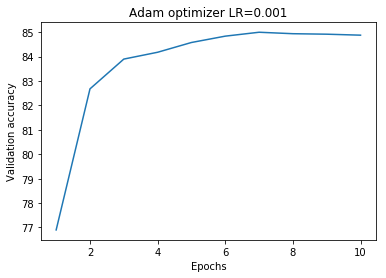

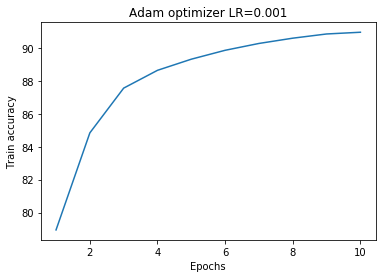

In [8]:
learning_rate = 0.001
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
#optimizer_Adam= torch.optim.SGD(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data.long(), lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

val_acc_list=[]
train_acc_list=[]
for epoch in range(num_epochs):
    scheduler.step()
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data.long(), lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            train_acc = test_model(train_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}, Training Accuracy:{}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc,train_acc))
    val_acc_list.append(val_acc)
    train_acc_list.append(train_acc)
    
import matplotlib.pyplot as plt
%matplotlib inline

epochs=[i for i in range(1,num_epochs+1)]
plt.plot(epochs,val_acc_list)
plt.ylabel("Validation accuracy")
plt.xlabel("Epochs")
plt.title("Adam optimizer LR="+str(learning_rate))
plt.show()

epochs=[i for i in range(1,num_epochs+1)]
plt.plot(epochs,train_acc_list)
plt.ylabel("Train accuracy")
plt.xlabel("Epochs")
plt.title("Adam optimizer LR="+str(learning_rate))
plt.show()


In [17]:
print ("Test Acc {}".format(test_model(test_loader, model)))

Test Acc 85.18


In [22]:
def correct_incorrect(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    incorrect = 0
    model.eval()
    for data, lengths, labels in loader:
        if correct==3 and incorrect==3:
            break
        data_batch, length_batch, label_batch = data.long(), lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        for i in range(len(predicted)):
            rev=""
            if predicted[i]==labels[i] and correct<3:
                correct=correct+1
                print("Correct")
                for j in data_batch[i]:
                    rev+=id2token[j.item()]+" "
                print(rev)
                if labels[i]==1:
                    print("-positive")
                if labels[i]==0:
                    print("-negative")
        for i in range(len(predicted)):
            rev=""
            if predicted[i]!=labels[i] and incorrect<3:
                incorrect=incorrect+1
                print("InCorrect")
                for j in data_batch[i]:
                    rev+=id2token[j.item()]+" "
                print(rev)
                if labels[i]==1:
                    print("-positive")
                if labels[i]==0:
                    print("-negative")
    #return (100 * correct / total)

In [23]:
correct_incorrect(val_loader, model)

Correct
vincent <unk> plays the part of paul an ex con <unk> to an office job where he meets <unk> a secretary who is <unk> <unk> when she has her hearing <unk> in <unk> <unk> when not played by <unk> <unk> together they help each other to develop as <unk> /><br />what was particularly interesting about this film was the <unk> of the characters  not fitting into obvious stereotypes paul appears <unk> in the office environment is it that he 's just not cut out for work this belief is <unk> when he gets a job in a bar and <unk> /><br />the film has a certain <unk> which i find refreshing and showed how easy is to act <unk> even if we think it is <unk> or <unk> /><br />finally it is a film full of great <unk> both touching and humorous one is when <unk> is <unk> and is trying to <unk> a screaming baby she continues to <unk> it  but takes her hearing <unk> out for her own <unk> <unk> <unk> plays the the part part of <unk> <unk> <unk> <unk> <unk> <unk> to an <unk> <unk> <unk> where he he 